In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [2]:
data = pd.read_csv('./OneSector_data.csv')

In [3]:
data = data[:706]

In [4]:
data

,rent_date,rent_number,day,year,month,T,rain,H,I,weekend,Sector_0,holiday,error
0,2019-04-16,1,16,2019,4,16.479167,0,45.375000,1.387857,0,1,0,0.00
1,2019-04-20,2,20,2019,4,17.125000,0,76.375000,1.622000,1,1,0,0.00
2,2019-04-21,2,21,2019,4,18.308333,0,69.625000,1.358000,1,1,0,0.00
3,2019-04-24,2,24,2019,4,18.420833,0,86.083333,1.126667,0,1,0,0.00
4,2019-04-25,3,25,2019,4,15.937500,0,90.833333,0.678667,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2021-05-27,116,27,2021,5,19.062500,3,82.250000,1.520000,0,1,0,18.27
702,2021-05-28,129,28,2021,5,20.887500,0,62.208333,1.468000,1,1,0,33.72
703,2021-05-29,146,29,2021,5,19.741667,0,64.958333,1.948000,1,1,0,0.57
704,2021-05-30,179,30,2021,5,21.308333,0,64.333333,1.871333,1,1,0,41.65


In [5]:
from sklearn.ensemble import ExtraTreesRegressor

In [21]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

In [6]:
def Plot(x1,y_test):

    fig, axes = plt.subplots(1,1,figsize=(10,4))
    axes.plot(x1, y_test, label='real_value')
    axes.set_xlabel('Date', fontsize=16)
    axes.set_ylabel('Rent Count', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    axes.legend()
    plt.show()

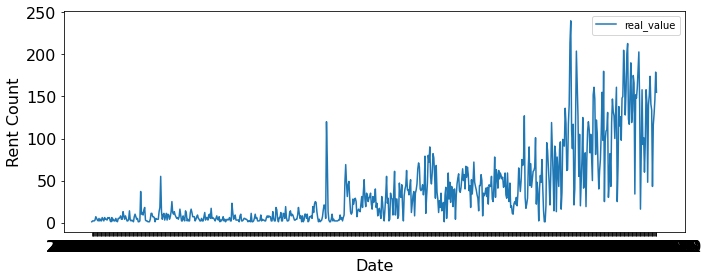

In [7]:
Plot(data['rent_date'], data['rent_number'])

In [8]:
X_data = data.drop(['rent_date','rent_number'],axis=1)
y_data = data['rent_number']

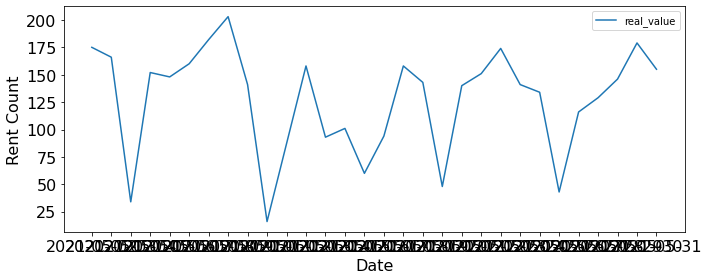

In [9]:
Plot(data['rent_date'][-30:], data['rent_number'][-30:])

In [25]:
mean_mape = []
mean_time = []

In [26]:
for i in range(676, 706):
    start = time.time()
    X_train = X_data.iloc[:i]
    y_train = y_data.iloc[:i]
    X_test = X_data.iloc[i:i+1]
    y_test = y_data.iloc[i:i+1]
    xlf = ExtraTreesRegressor()
    xlf.fit(X_train, y_train)
    pred = xlf.predict(X_test)
    pred = pred.astype(int)
    end = time.time()
    train_time = end-start
    mean_mape.append(MAPE(pred[0],data['rent_number'][i]))
    mean_time.append(train_time)
    print(data['rent_date'][i], "/ 예측 =", pred[0], "대", "/ MAPE =", MAPE(pred[0],data['rent_number'][i]), 
          "/ 학습시간 =", train_time, "초")
    print("-----------------------------------------------")

print("30일 예측 평균 MAPE =", sum(mean_mape)/len(mean_mape))
print("30일 예측 평균 학습시간 =", sum(mean_time)/len(mean_mape))

2021-05-02 / 예측 = 126 대 / MAPE = 38.88888888888889 / 학습시간 = 0.15957355499267578 초
-----------------------------------------------
2021-05-03 / 예측 = 132 대 / MAPE = 25.757575757575758 / 학습시간 = 0.1545860767364502 초
-----------------------------------------------
2021-05-04 / 예측 = 41 대 / MAPE = 17.073170731707318 / 학습시간 = 0.1545865535736084 초
-----------------------------------------------
2021-05-05 / 예측 = 173 대 / MAPE = 12.138728323699421 / 학습시간 = 0.15558362007141113 초
-----------------------------------------------
2021-05-06 / 예측 = 159 대 / MAPE = 6.918238993710692 / 학습시간 = 0.15558385848999023 초
-----------------------------------------------
2021-05-07 / 예측 = 144 대 / MAPE = 11.11111111111111 / 학습시간 = 0.1545865535736084 초
-----------------------------------------------
2021-05-08 / 예측 = 156 대 / MAPE = 16.666666666666664 / 학습시간 = 0.16256499290466309 초
-----------------------------------------------
2021-05-09 / 예측 = 168 대 / MAPE = 20.833333333333336 / 학습시간 = 0.1575784683227539 초
--------